### Интернет-магазин компьютерных игр по всему миру 

Нам предоставленны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

Нам необходимо:

* выявить определяющие успешность игры закономерности, позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании
* отработать принцип работы с данными для прогназирования данных на следующие годы

#### Содержание
2.3 Шаг 1. Откройте файл с данными и изучите общую информацию

    2.3.1 Открываем файл и изучаем данные

    2.3.2 Посмотрим типы данных столбцов

    2.3.3 Посмотрим количество пропусков в столбцах

    2.3.4 Выведем гистограммы

    2.3.5 Вывод по шагу 1

2.4 Шаг 2. Подготовьте данные

    2.4.1 Заменим названия столбцов (приведем к нижнему регистру)

    2.4.2 Преобразуем данные в нужные типы

    2.4.3 Обработаем пропуски при необходимости

        2.4.3.1 Столбцы name и genre

        2.4.3.2 Столбец year_of_release

        2.4.3.3 Столбец critic_score

        2.4.3.4 Столбец user_score

        2.4.3.5 Столбец rating

    2.4.4 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

    2.4.5 Вывод по шагу 2

2.5 Шаг 3. Проведем исследовательский анализ данных

    2.5.1 Посмотрим, сколько игр выпускалось в разные годы
    
    2.5.2 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
    2.5.3 Актуальный период
    
    2.5.4 Какие платформы лидируют по продажам, растут или падают
    
    2.5.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
    
    2.5.6 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
    
    2.5.7 Соотнесем выводы с продажами игр на других платформах.
    
        2.5.7.1 Построим диаграмму рассеяния для отзывов пользователей и отзывов критиков для XOne
        
        2.5.7.2 Посчитаем корреляцию между отзывами и продажами пользователей и критиков для XOne
        
        2.5.7.3 Построим диаграмму рассеяния для отзывов пользователей и отзывов критиков для 3DS
        
        2.5.7.4 Посчитаем корреляцию между отзывами и продажами пользователей и критиков для 3DS
        
        2.5.7.5 Построим диаграмму рассеяния для отзывов пользователей и отзывов критиков для РС
        
        2.5.7.6 Посчитаем корреляцию между отзывами и продажами пользователей и критиков для 3DS
        
    2.5.8 Обшее распределение игр по жанрам

    2.5.9 Вывод по шагу 3
    
2.6 Шаг 4. Составим портрет пользователя каждого региона

    2.6.1 Самые популярные платформы (топ-5)
    
    2.6.2 Самые популярные жанры (топ-5).
    
    2.6.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
    2.6.4 Вывод по шаги 4
    
2.7 Шаг 5. Проверьте гипотезы

    2.7.1 Средние пользовательские рейтинги платформ Xbox One и РС одинаковые

    2.7.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

    2.7.3 Вывод по шагу 5

2.8 Шаг 6. Напишите общий вывод

    2.8.1 ОБЩИЙ ВЫВОД:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import scipy
from scipy.stats import levene
from collections import Counter

#### Шаг 1. Откройте файл с данными и изучите общую информацию

##### Открываем файл и изучаем данные

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### Посмотрим типы данных столбцов

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*После просмотра информации о типах столбцов, стало понятно, что необходимо изменить тип следующих столбцов:*
* Year_of_Release на тип Int32
* Critic_Score на тип Int64
* User_Score на тип float32

##### Посмотрим количество пропусков в столбцах

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

*Пропуски обнаружены в следующих столбцах:*
* Name  
* Year_of_Release 
* Genre  
* Critic_Score
* User_Score 
* Rating 

##### Выведем гистограммы

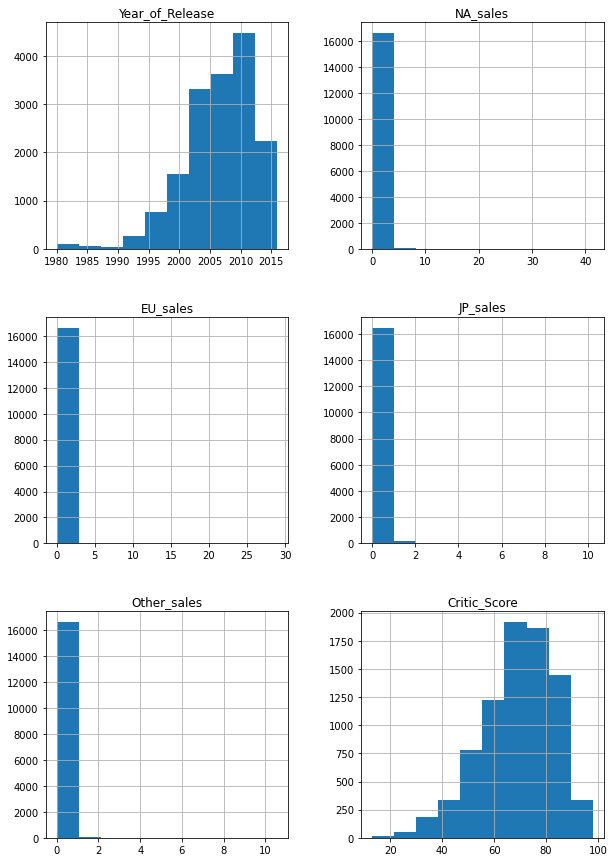

In [6]:
data.hist(figsize=(10, 15));

#####  Вывод по шагу 1

Таким образом, мы получили основную информацию о датасете. 

Видим, что названия столбцов нужно привести к одному регистру. 

Также нужно изменить некоторые типы данных столбцов:
* Year_of_Release на тип Int32
* Critic_Score на тип Int64
* User_Score на тип float32

Пропуски обнаружены в следующих столбцах:
* Name  
* Year_of_Release 
* Genre  
* Critic_Score
* User_Score 
* Rating 

#### Шаг 2. Подготовьте данные

#####  Заменим названия столбцов (приведем к нижнему регистру)

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#####  Преобразуем данные в нужные типы

In [9]:
#Посмотрим типы данных столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Заменим тип в столбце year_of_release, чтобы удобнее работать и экономии памяти.*

*В столбце critic_score для экономии памяти.*

*И в столбце user_score для удобства работы с данными.*

In [10]:
data['year_of_release'] = data['year_of_release'].astype('Int32')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = data['user_score'].astype('float32', errors='ignore')

#####  Обработаем пропуски при необходимости

###### Cтолбцы name и genre

In [11]:
#Проверим количество пропусков
print('Количество пропусков в столбце name:', data['name'].isna().sum())
print('Количество пропусков в столбце genre:',data['genre'].isna().sum())

Количество пропусков в столбце name: 2
Количество пропусков в столбце genre: 2


In [12]:
#Проверим, не совпадают ли эти строки
data[(data['name'].isna()) & (data['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


*Скорее всего эти данные просто пропустиои или забыли ввести. Такие пропуски мы ни на то заменить не сможем и их не много, поэтому целесообразнее будет эти строки удалить.*

In [13]:
data = data.dropna(subset=['name'])

In [14]:
#Проверим количество пропусков в столбцах name и genre после удаления
print('Количество пропусков в столбце name:', data['name'].isna().sum())
print('Количество пропусков в столбце genre:',data['genre'].isna().sum())

Количество пропусков в столбце name: 0
Количество пропусков в столбце genre: 0


###### Cтолбец year_of_release

In [15]:
#Проверим количество пропусков в столбце year_of_release
data['year_of_release'].isna().sum()

269

Для столбца year_of_release удалим строки с пропусками, так как их достаточно мало.

In [16]:
data = data.dropna(subset=['year_of_release'])

In [17]:
#Проверим количество пропусков в столбце year_of_release после заполнения и удаления
data['year_of_release'].isna().sum()

0

###### Cтолбец critic_score

In [18]:
#Проверим количество пропусков в столбце critic_score
data['critic_score'].isna().sum()

8461

*Пропуски в столбце critic_score на -1, для дальнейшего удобства в работе*

In [19]:
data['critic_score'] = data['critic_score'].fillna(-1)

###### Cтолбец user_score

In [20]:
#Проверим количество пропусков в столбце user_score
data['user_score'].isna().sum()

6605

In [21]:
#Посмотрим на содержимое колонки
data['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

*В столбце есть запить tbd, которая означает "подлежит обсуждению". Заменим это значение на пропуск.*

In [22]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

*Заменим пропуски в user_score на -1, для дальнейшего удобства в работе*

In [23]:
data['user_score'] = data['user_score'].fillna(-1)

###### Cтолбец rating

In [24]:
#Проверим количество пропусков в столбце rating
data['rating'].isna().sum()

6676

*Некоторые игры не имеют ограничений по возрасту, поэтому заменим пропуски на 'no', показывая, что ограничыений нет.*

In [25]:
data['rating'] = data['rating'].fillna('no')

In [26]:
#Проверим количество пропусков в столбце rating после обработки
data['rating'].isna().sum()

0

In [27]:
data.pivot_table(index='rating', values='name', aggfunc='count')

,name
rating,
AO,1
E,3921
E10+,1393
EC,8
K-A,3
M,1536
RP,1
T,2905
no,6676


In [28]:
#data[data['rating'] == 'AO'].dropna(subset=['rating'])
#data.pivot_table(index='rating', values='name', aggfunc='count')

#####  Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [29]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [30]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,no,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,no,31.38


##### Вывод по шагу 2

Мы изменили регистр названия столбцов, привели его к единому. 

Мы изменили типы данных в столбце year_of_release, чтобы удобнее работать с датами, в столбце critic_score для экономии памяти и в столбце user_score для удобства работы с данными. 

Изменили некоторые типы данных столбцов:
* Year_of_Release на тип Int32
* Critic_Score на тип Int64
* User_Score на тип float32

Также необходимо было убрать возможные пропуски в следующих столбцах:
* Name (удалили строки, тк данные невозможно восстановить)
* Year_of_Release (заменили на медианное значение по платформам)
* Genre (удалили строки, тк данные невозможно восстановить)
* Critic_Score (заменили пропуски на -1.)
* User_Score (заменили tbd на пропуск, остальные пропуски заменили на -1)
* Rating (заменим пропуски на 'no', показывая, что ограничений нет)

Далее, мы посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

#### Шаг 3. Проведем исследовательский анализ данных

#####  Посмотрим, сколько игр выпускалось в разные годы

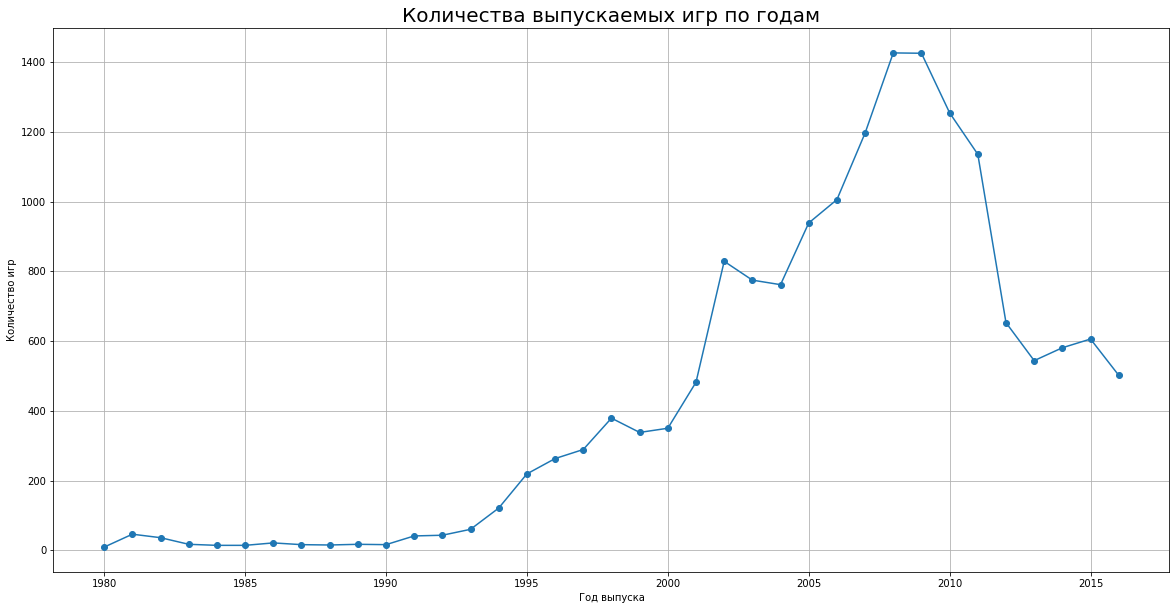

In [31]:
plt.figure(figsize=(20, 10))
plt.title('Количества выпускаемых игр по годам', fontsize=20)
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.plot(data.groupby('year_of_release')['name'].count(), 'o-', label='Количество игр', alpha=1)
plt.grid(True)

Мы видим, что в период с 1980 по 1990 количество выпускаемых игр практически не меняется, далее с 1990 по 2008 наблюдается рост и с 2009 по 2016 идет резкий спад. Максимальное количество выпускаемых игр превышает числе 1440. Думаю, для анализа нам наиболее важны периоды роста и спада, то есть периоды с 1990 по 2008 и с 2009 по 2016.

#####  Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

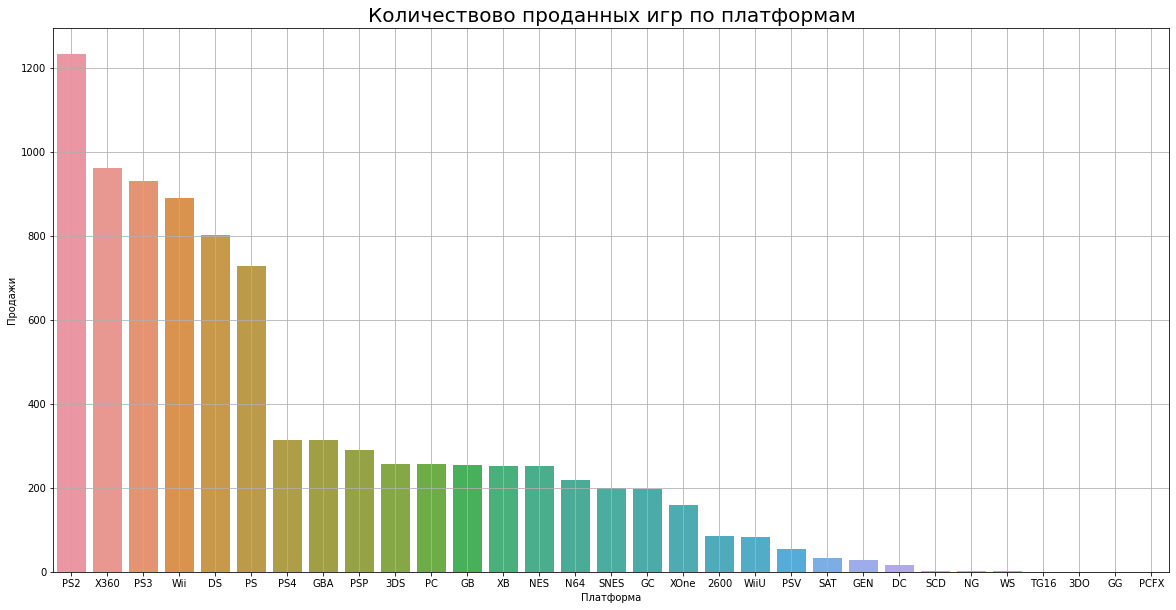

In [32]:
#Построим график, на котором отобразим количество пролданных игр по каждой платформе и отсортируем по убыванию
plt.figure(figsize=(20, 10))
plt.title('Количествово проданных игр по платформам', fontsize=20)
sns.barplot(x= data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).index, y=data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)['total_sales'])
plt.ylabel('Продажи')
plt.xlabel('Платформа')
plt.grid(True);

*Лидерами продаж являются:* 
* PS2
* X360
* PS3
* Wii
* DS
* PS

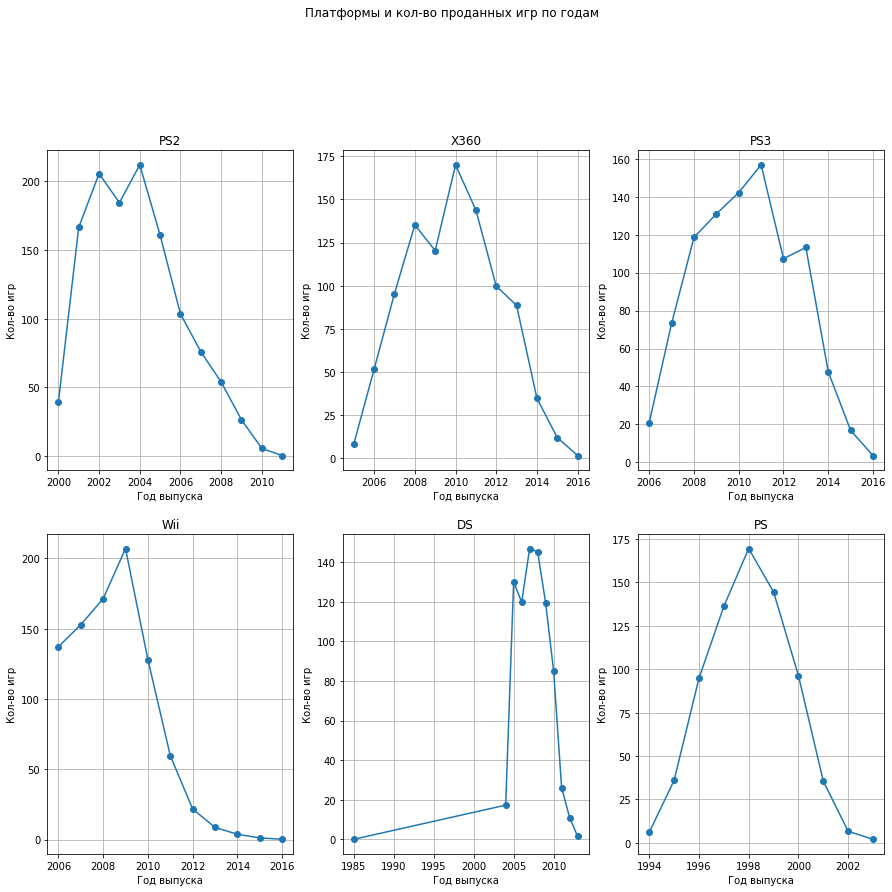

In [33]:
#Построим распределение по годам
i = 0
top_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()['platform'].head(6)
plt.figure(figsize=[15, 20])
plt.suptitle('Платформы и кол-во проданных игр по годам')
for name in top_platform:
    i += 1
    pvt = data.query('platform == @name').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.subplot(3, 3, i)
    plt.title(name)
    plt.plot(pvt, 'o-', label='Кол-во игр')
    plt.ylabel('Кол-во игр')
    plt.xlabel('Год выпуска')
    plt.grid(True)
plt.show();

In [34]:
term_game = []
for name in top_platform:
    df_term_game = data.query('(platform == @name)').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').count()
    term_game.append(df_term_game)
term = int(np.mean(term_game))
print(f'Характерный срок за который появляются новые игры: {term} лет')

Характерный срок за который появляются новые игры: 11 лет


#####  Актуальный период

Актуальный период возьмем с 2014 года, так как стоит брать актуальные данные за последние несколько лет.

#####  Какие платформы лидируют по продажам, растут или падают

*Обозначим актуальный период*

In [35]:
current_period = data.query('year_of_release >= 2014').sort_values(by='total_sales', ascending=False)

*Выведем распределение значений в данных*

In [36]:
current_period.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


*Построим график для наглядности по актуальному периоду*

Text(0.5, 0, 'Год выпуска')

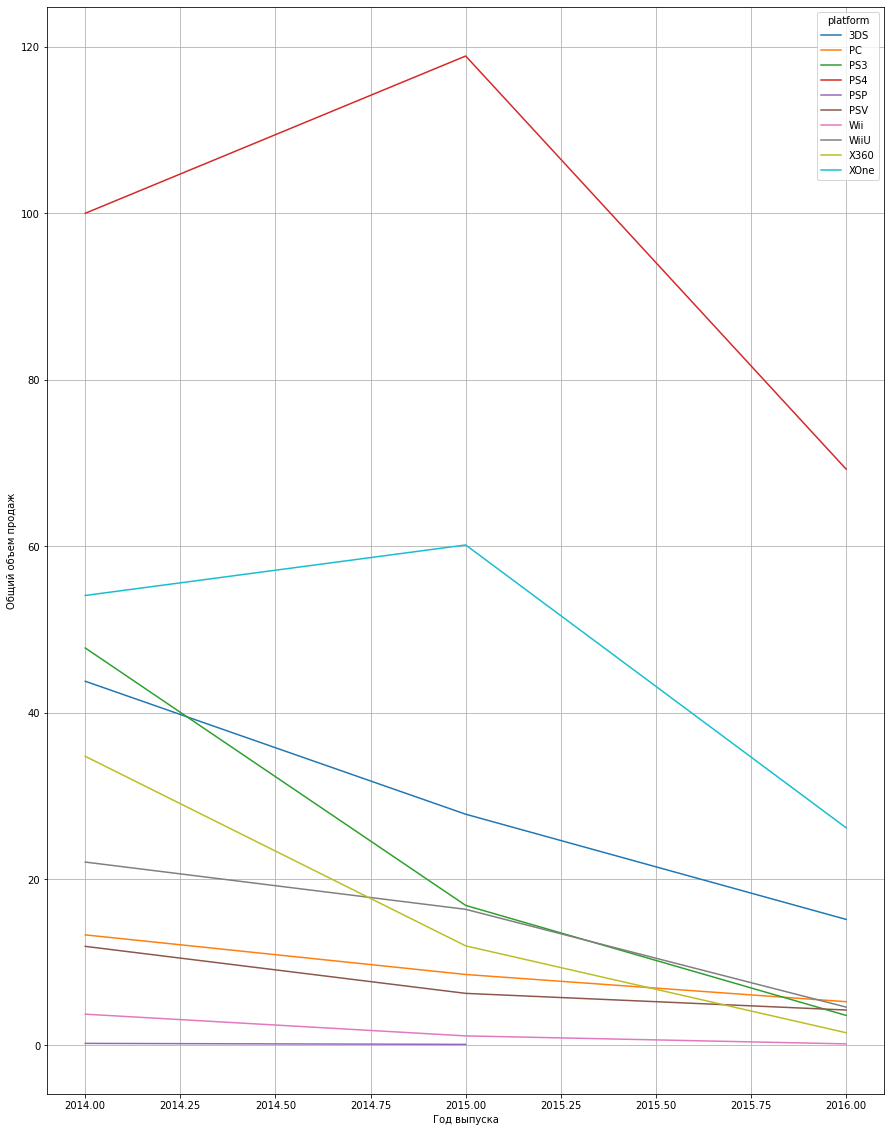

In [37]:
current_period.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 20))
plt.ylabel('Общий объем продаж', fontsize=10)
plt.xlabel('Год выпуска', fontsize=10)

*Наиболее прибыльные по последним данным платформы:*
* PS4
* XOne
* 3DS
* PC
* WiiU

*Выбранные нами наиболее прибыльные платформы актуальными в своих новых линейках. Количество продаж у них наибольшее, как мы видим по графику. А платформа PC также имеет высокое количество продаж и стабильность на рынке. У всех платформ продажи идут на спад, но у эих трех самое большое количество продаж за последнее время.*

#####  Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [38]:
data_plat = current_period.groupby('platform')['total_sales'].describe()

(0.0, 1.5)

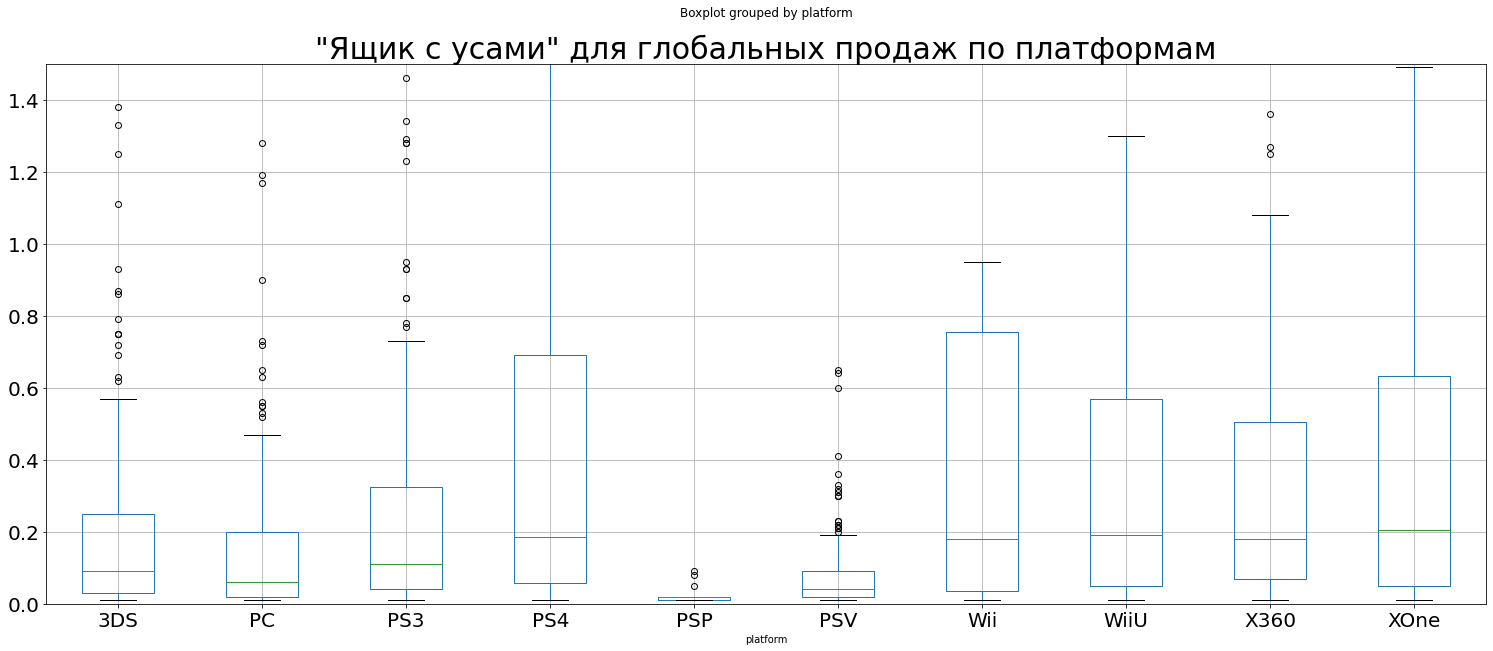

In [39]:
current_period.boxplot(column='total_sales', by='platform',figsize=(25,10), fontsize=20)
plt.title('"Ящик с усами" для глобальных продаж по платформам', fontsize=30)
plt.ylim(0, 1.5)

Медиана у выбранных нами ранее лидеров дальше остальных, разброс больше, то есть количество продаж больше.

#####  Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [40]:
df_ps4 = current_period[(current_period['platform'] == 'PS4') & (current_period['user_score'] != -1) & (current_period['user_score'] != 0) ]
df_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42,2.3,E10+,0.01
16135,Super Stardust Ultra VR,PS4,2016,Shooter,0.00,0.01,0.00,0.00,66,6.2,E10+,0.01
15734,Prototype: Biohazard Bundle,PS4,2016,Action,0.01,0.00,0.00,0.00,48,2,M,0.01
15839,Mark McMorris Infinite Air,PS4,2016,Sports,0.01,0.00,0.00,0.00,49,6,T,0.01


*Построим диаграмму рассеяния для отзывов пользователей и отзывов критиков*

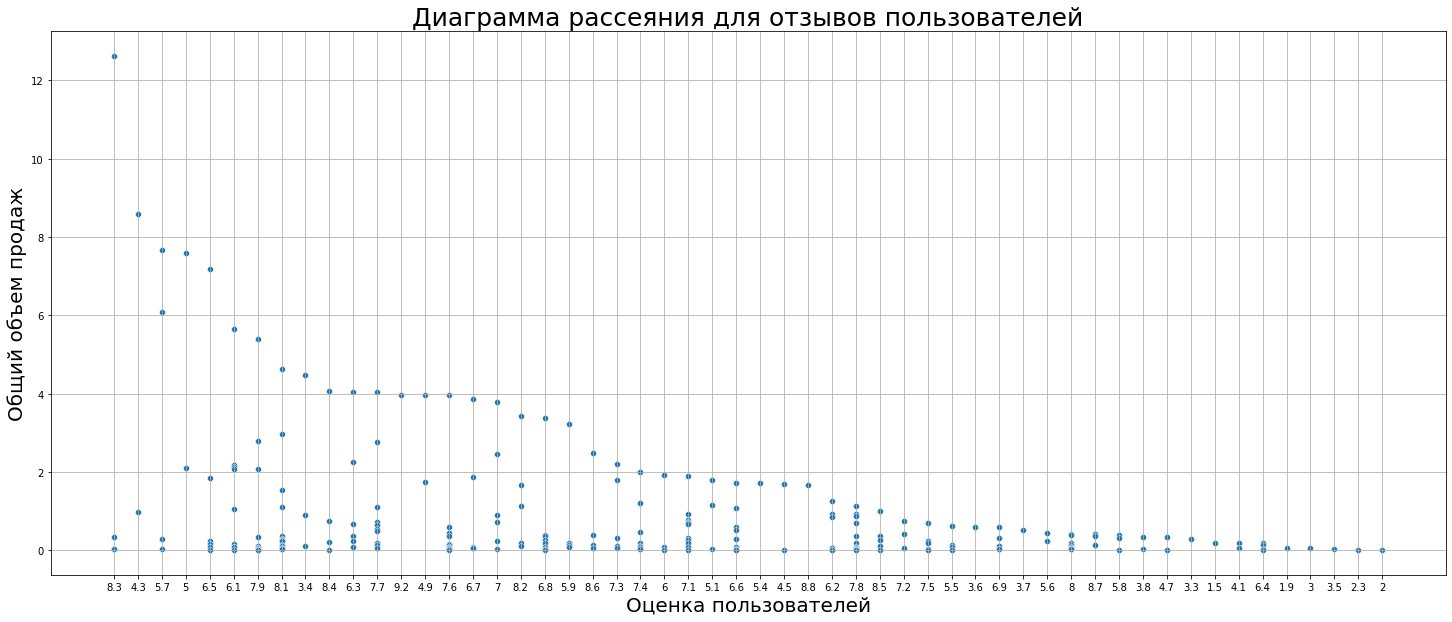

In [41]:
plt.figure(figsize=(25, 10))
plt.title('Диаграмма рассеяния для отзывов пользователей', fontsize=25)
sns.scatterplot(x='user_score', y='total_sales', data=df_ps4)
plt.ylabel('Общий объем продаж', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=20)
plt.grid(True)

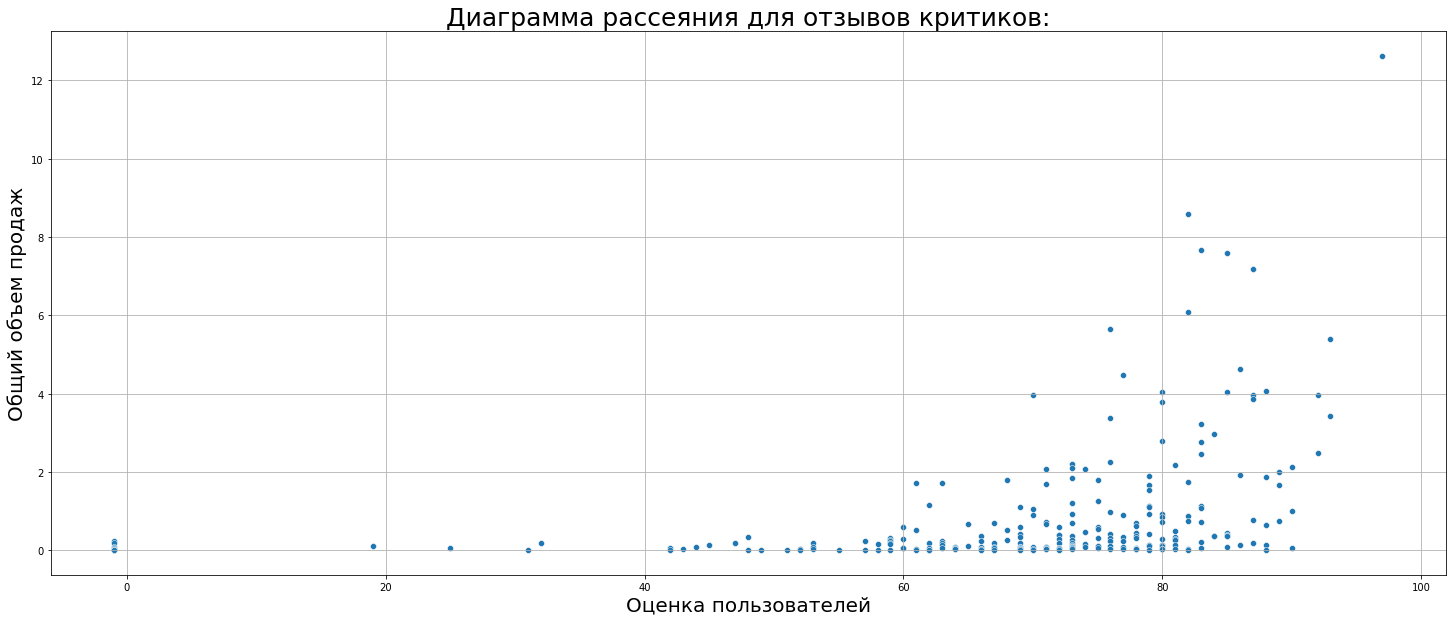

In [42]:
plt.figure(figsize=(25, 10))
plt.title('Диаграмма рассеяния для отзывов критиков:', fontsize=25)
sns.scatterplot(x='critic_score', y='total_sales', data=df_ps4)
plt.ylabel('Общий объем продаж', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=20)
plt.grid(True)

*Посчитаем корреляцию между отзывами и продажами пользователей и критиков*

In [43]:
cor_critic_score = df_ps4['total_sales'].corr(df_ps4['critic_score'].astype('float32'))
cor_user_score = df_ps4['total_sales'].corr(df_ps4['user_score'].astype('float32'))
print(f'Коэффицент корреляции для отзывов критиков - {cor_critic_score:.2f}')
print(f'Коэффицент корреляции для отзывов пользователей - {cor_user_score:.2f}')

Коэффицент корреляции для отзывов критиков - 0.34
Коэффицент корреляции для отзывов пользователей - -0.04


*Коэффицент корреляции для оценки критиков 0.5, говорит об их слабом влиянии на продажи. В случае с пользователями влияние отсутствет, так как значение близко к 0.*

#####  Соотнесем выводы с продажами игр на других платформах.

###### Построим диаграмму рассеяния для отзывов пользователей и отзывов критиков для XOne

In [44]:
df_xone = current_period[(current_period['platform'] == 'XOne') & (current_period['user_score'] != -1) & (current_period['user_score'] != 0) ]


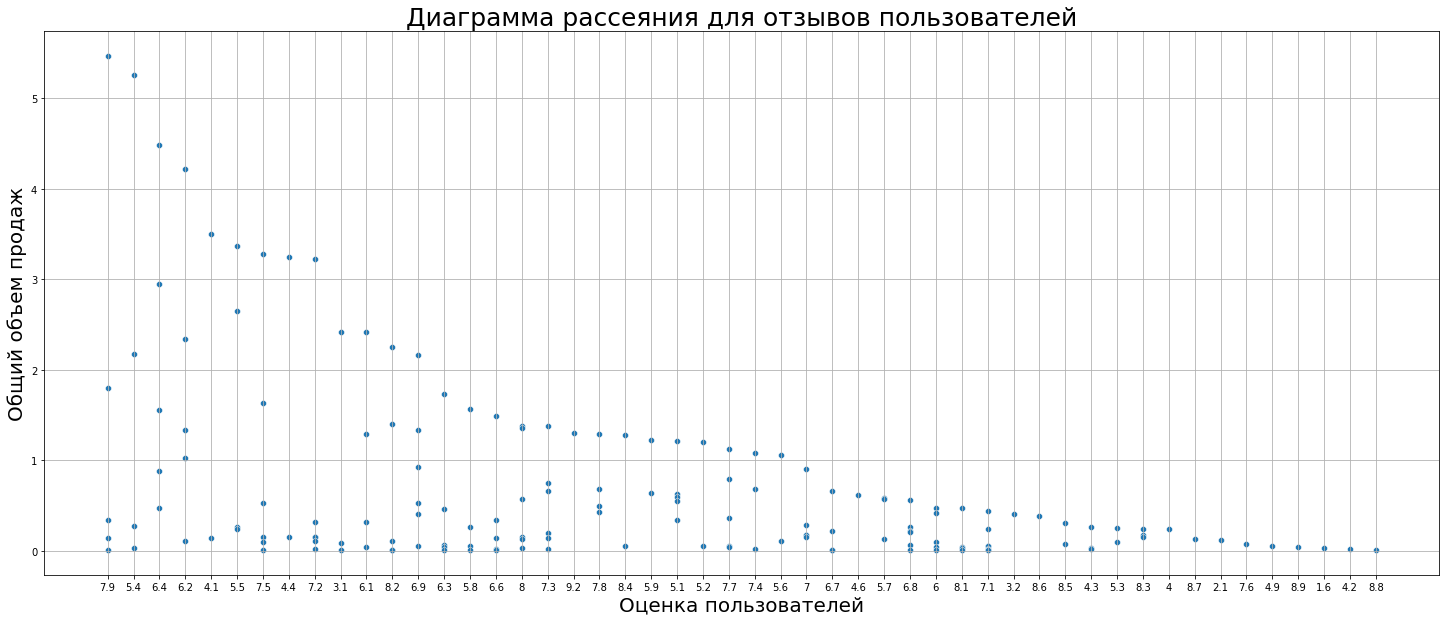

In [45]:
plt.figure(figsize=(25, 10))
plt.title('Диаграмма рассеяния для отзывов пользователей', fontsize=25)
sns.scatterplot(x='user_score', y='total_sales', data=df_xone)
plt.ylabel('Общий объем продаж', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=20)
plt.grid(True)

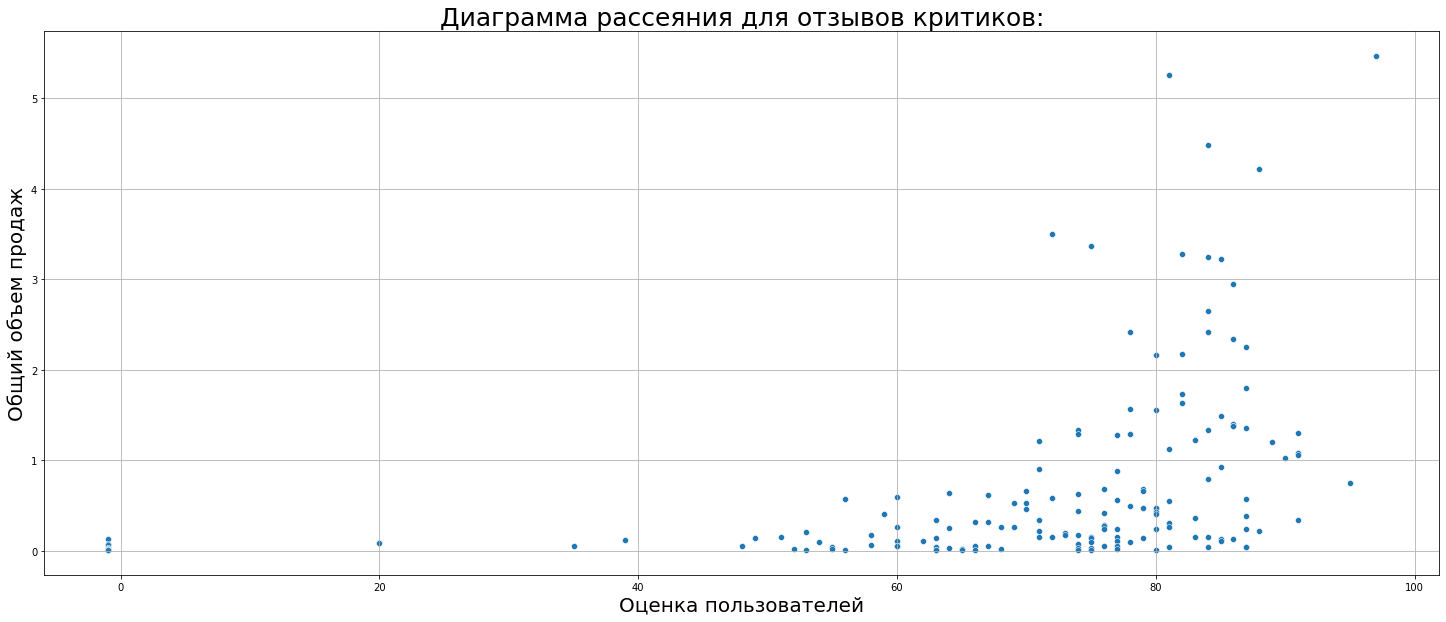

In [46]:
plt.figure(figsize=(25, 10))
plt.title('Диаграмма рассеяния для отзывов критиков:', fontsize=25)
sns.scatterplot(x='critic_score', y='total_sales', data=df_xone)
plt.ylabel('Общий объем продаж', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=20)
plt.grid(True)

###### Посчитаем корреляцию между отзывами и продажами пользователей и критиков для XOne

In [47]:
cor_crit_xone= df_xone['total_sales'].corr(df_xone['critic_score'].astype('float32'))
cor_user_xone = df_xone['total_sales'].corr(df_xone['user_score'].astype('float32'))
print(f'Коэффицент корреляции для отзывов критиков - {cor_crit_xone:.2f}')
print(f'Коэффицент корреляции для отзывов пользователей - {cor_user_xone:.2f}')

Коэффицент корреляции для отзывов критиков - 0.37
Коэффицент корреляции для отзывов пользователей - -0.07


*Коэффицент корреляции для оценки критиков 0.5, говорит об их слабом влиянии на продажи. В случае с пользователями влияние отсутствет, так как значение близко к 0.*

###### Построим диаграмму рассеяния для отзывов пользователей и отзывов критиков для 3DS

In [48]:
df_3ds = current_period[(current_period['platform'] == '3DS') & (current_period['user_score'] != -1) & (current_period['user_score'] != 0) ]


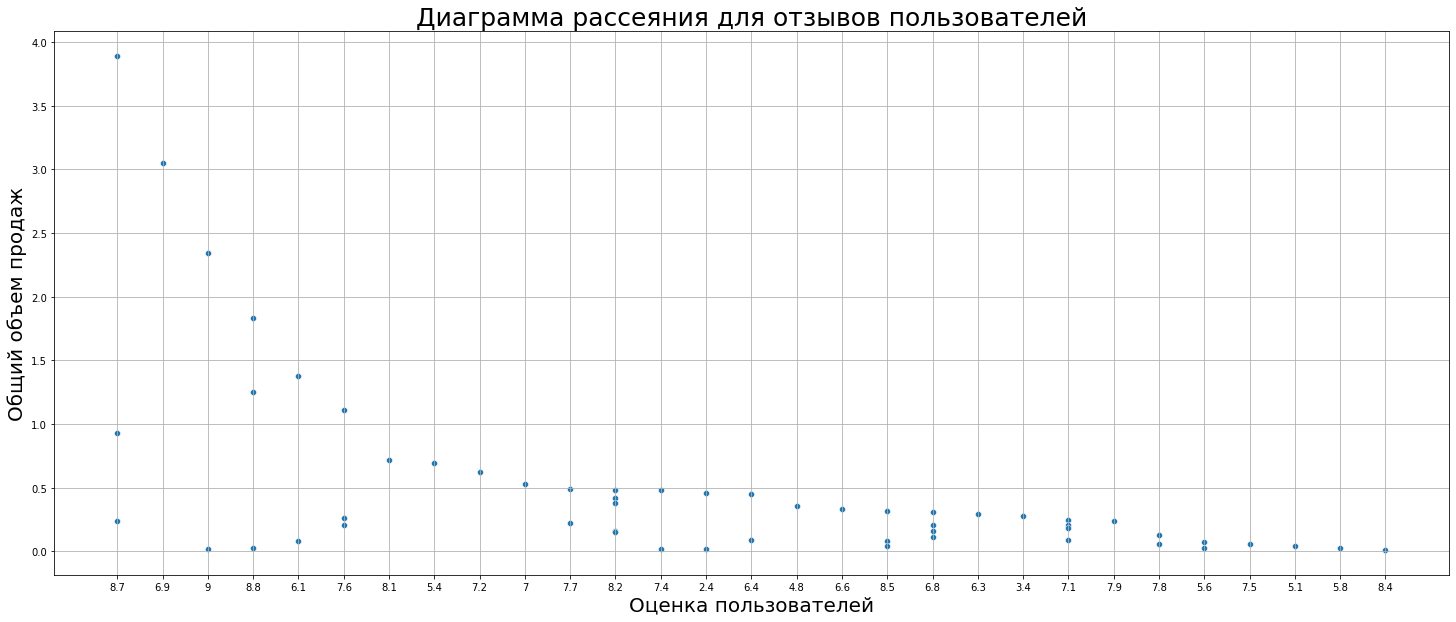

In [49]:
plt.figure(figsize=(25, 10))
plt.title('Диаграмма рассеяния для отзывов пользователей', fontsize=25)
sns.scatterplot(x='user_score', y='total_sales', data=df_3ds)
plt.ylabel('Общий объем продаж', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=20)
plt.grid(True)

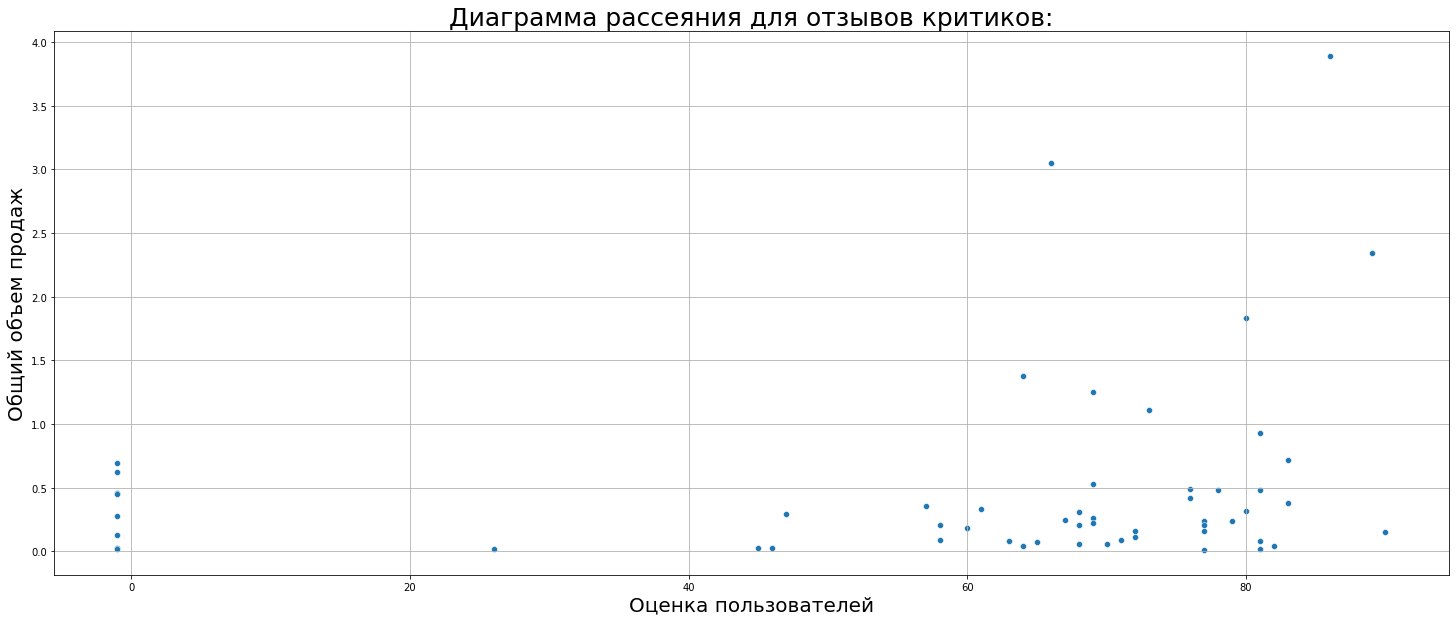

In [50]:
plt.figure(figsize=(25, 10))
plt.title('Диаграмма рассеяния для отзывов критиков:', fontsize=25)
sns.scatterplot(x='critic_score', y='total_sales', data=df_3ds)
plt.ylabel('Общий объем продаж', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=20)
plt.grid(True)

###### Посчитаем корреляцию между отзывами и продажами пользователей и критиков для 3DS

In [51]:
cor_crit_3ds= df_3ds['total_sales'].corr(df_3ds['critic_score'].astype('float32'))
cor_user_3ds = df_3ds['total_sales'].corr(df_3ds['user_score'].astype('float32'))
print(f'Коэффицент корреляции для отзывов критиков - {cor_crit_3ds:.2f}')
print(f'Коэффицент корреляции для отзывов пользователей - {cor_user_3ds:.2f}')

Коэффицент корреляции для отзывов критиков - 0.19
Коэффицент корреляции для отзывов пользователей - 0.22


*Коэффицент корреляции для оценки критиков и пользователей меньше 0.5, говорит об их слабом влиянии на продажи. В случае с пользователями влияние отсутствет, так как значение близко к 0.*

###### Построим диаграмму рассеяния для отзывов пользователей и отзывов критиков для PC

In [52]:
df_pc = current_period[(current_period['platform'] == 'PC') & (current_period['user_score'] != -1) & (current_period['user_score'] != 0) ]


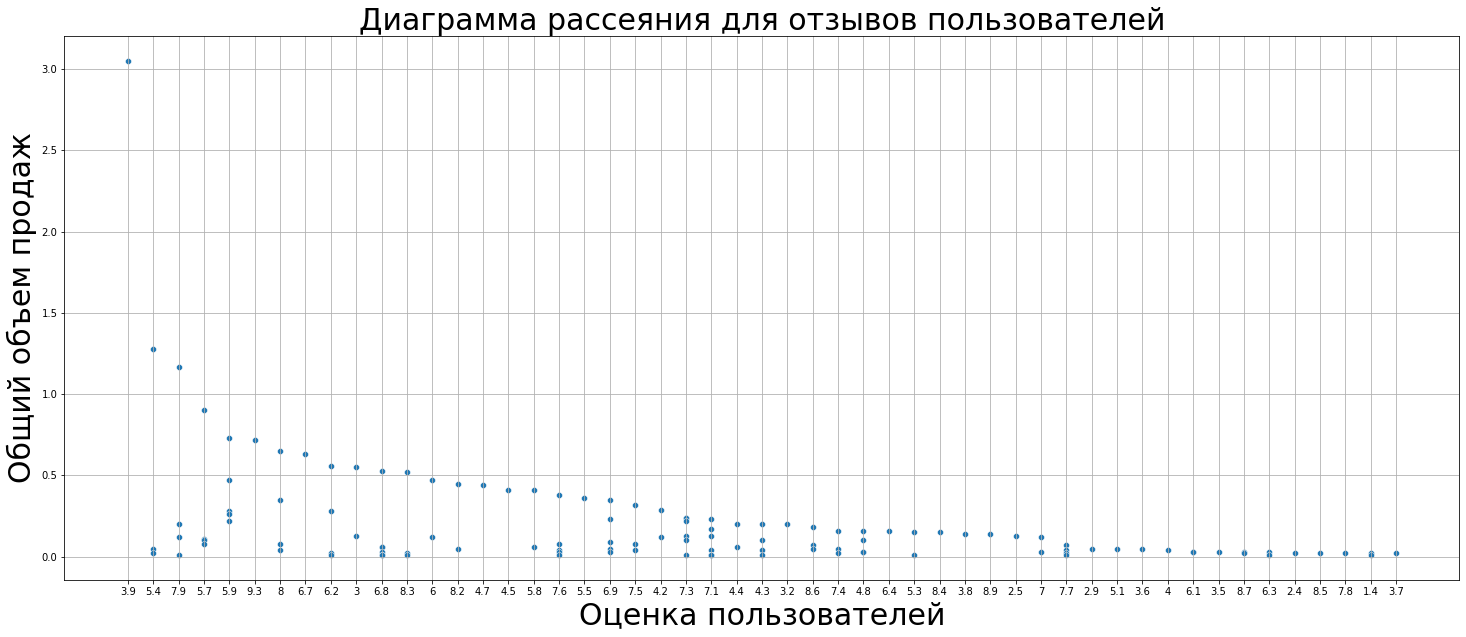

In [53]:
plt.figure(figsize=(25, 10))
plt.title('Диаграмма рассеяния для отзывов пользователей', fontsize=30)
sns.scatterplot(x='user_score', y='total_sales', data=df_pc)
plt.ylabel('Общий объем продаж', fontsize=30)
plt.xlabel('Оценка пользователей', fontsize=30)
plt.grid(True)

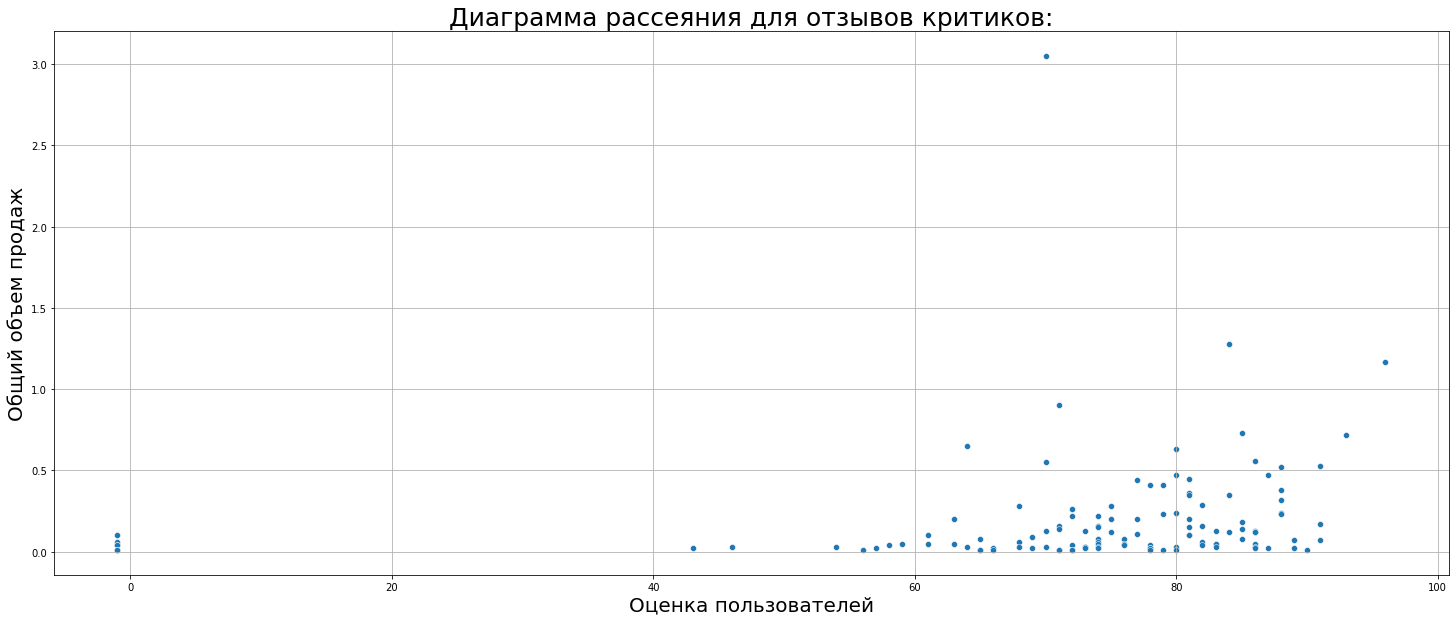

In [54]:
plt.figure(figsize=(25, 10))
plt.title('Диаграмма рассеяния для отзывов критиков:', fontsize=25)
sns.scatterplot(x='critic_score', y='total_sales', data=df_pc)
plt.ylabel('Общий объем продаж', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=20)
plt.grid(True)

###### Посчитаем корреляцию между отзывами и продажами пользователей и критиков для PC

In [55]:
cor_crit_pc= df_pc['total_sales'].corr(df_pc['critic_score'].astype('float32'))
cor_user_pc = df_pc['total_sales'].corr(df_pc['user_score'].astype('float32'))
print(f'Коэффицент корреляции для отзывов критиков - {cor_crit_3ds:.2f}')
print(f'Коэффицент корреляции для отзывов пользователей - {cor_user_3ds:.2f}')

Коэффицент корреляции для отзывов критиков - 0.19
Коэффицент корреляции для отзывов пользователей - 0.22


*Коэффицент корреляции для оценки критиков и пользователей меньше 0.5, говорит об их слабом влиянии на продажи. В случае с пользователями влияние отсутствет, так как значение близко к 0.*

###### Построим диаграмму рассеяния для отзывов пользователей и отзывов критиков для WiiU

In [56]:
df_wiiu = current_period[(current_period['platform'] == 'WiiU') & (current_period['user_score'] != -1) & (current_period['user_score'] != 0) ]


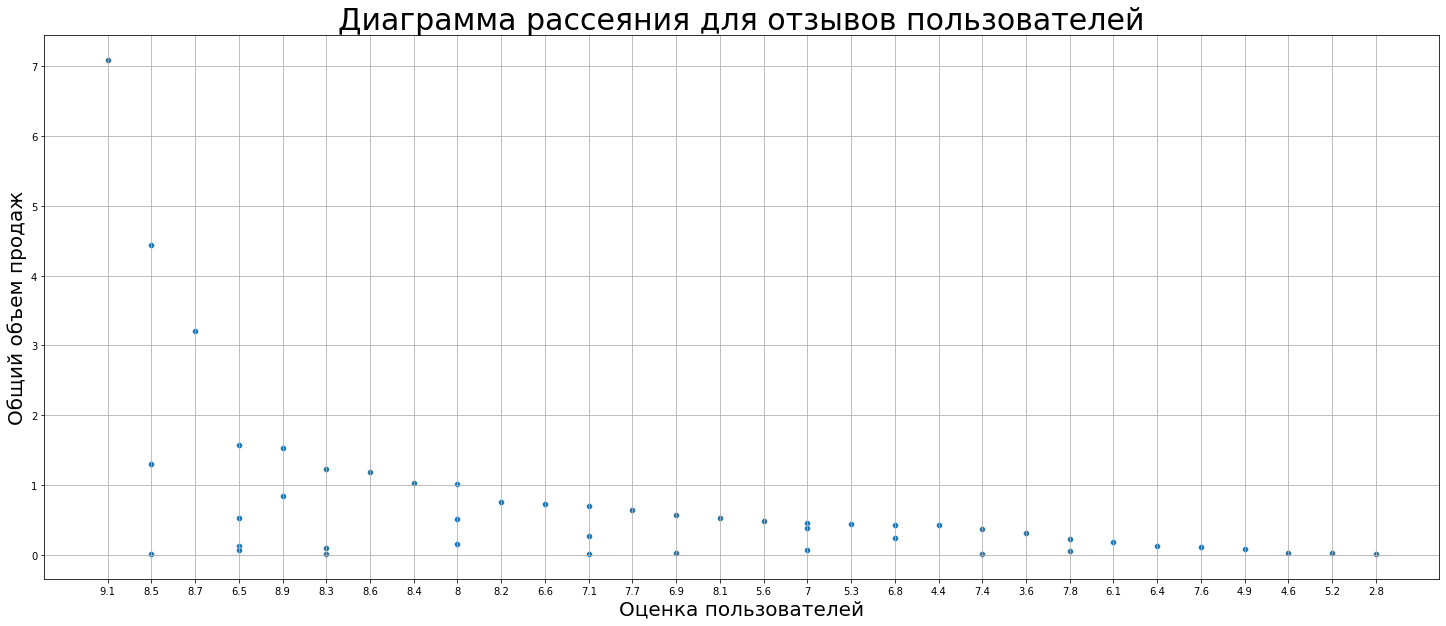

In [57]:
plt.figure(figsize=(25, 10))
plt.title('Диаграмма рассеяния для отзывов пользователей', fontsize=30)
sns.scatterplot(x='user_score', y='total_sales', data=df_wiiu)
plt.ylabel('Общий объем продаж', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=20)
plt.grid(True)

###### Посчитаем корреляцию между отзывами и продажами пользователей и критиков для WiiU

In [58]:
cor_crit_wiiu= df_wiiu['total_sales'].corr(df_wiiu['critic_score'].astype('float32'))
cor_user_wiiu = df_wiiu['total_sales'].corr(df_wiiu['user_score'].astype('float32'))
print(f'Коэффицент корреляции для отзывов критиков - {cor_crit_3ds:.2f}')
print(f'Коэффицент корреляции для отзывов пользователей - {cor_user_3ds:.2f}')

Коэффицент корреляции для отзывов критиков - 0.19
Коэффицент корреляции для отзывов пользователей - 0.22


*Коэффицент корреляции для оценки критиков и пользователей меньше 0.5, говорит об их слабом влиянии на продажи. В случае с пользователями влияние отсутствет, так как значение близко к 0.*

*Таком образом, коэффицент корреляции для оценки критиков и пользователей везде меньше 0.5, что говорит об их слабом влиянии на продажи. То есть продажа игр практически никак не зависит от оценок и пользователей, и зрителей.*

#####  Общее распределение игр по жанрам

*Построим график для самых продаваемых жанров*

Text(0.5, 0, 'Жанры')

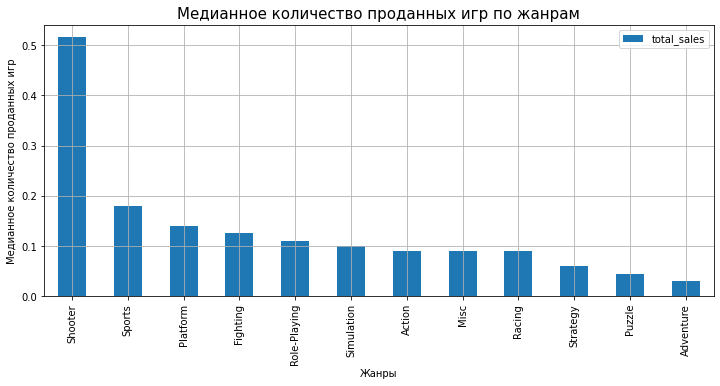

In [59]:
current_period.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).plot(kind = 'bar',grid=True, figsize=(12, 5))
plt.title('Медианное количество проданных игр по жанрам', fontsize=15)
plt.ylabel('Медианное количество проданных игр', fontsize=10)
plt.xlabel('Жанры', fontsize=10)

Text(0.5, 0, 'Жанр')

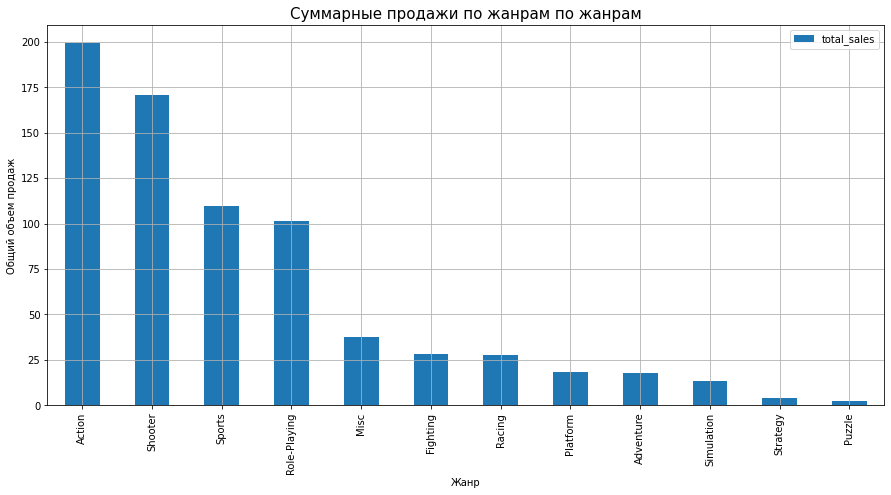

In [60]:
current_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind = 'bar',grid=True, figsize=(15, 7))
plt.title('Cуммарные продажи по жанрам по жанрам', fontsize=15)
plt.ylabel('Общий объем продаж', fontsize=10)
plt.xlabel('Жанр', fontsize=10)

*Построим график для самых непродаваемых жанров*

Text(0.5, 0, 'Жанры')

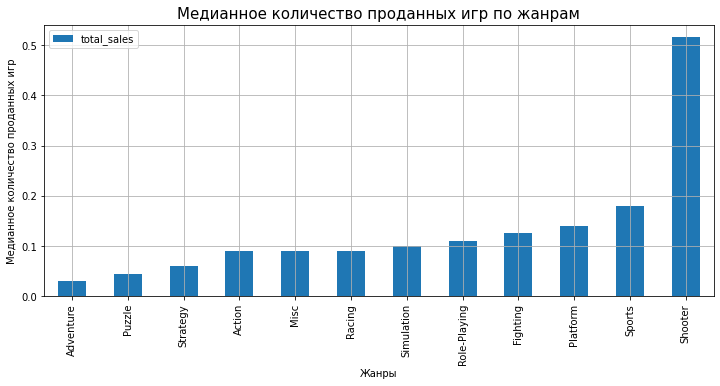

In [61]:
current_period.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=True).plot(kind = 'bar',grid=True, figsize=(12, 5))
plt.title('Медианное количество проданных игр по жанрам', fontsize=15)
plt.ylabel('Медианное количество проданных игр', fontsize=10)
plt.xlabel('Жанры', fontsize=10)

Text(0.5, 0, 'Жанр')

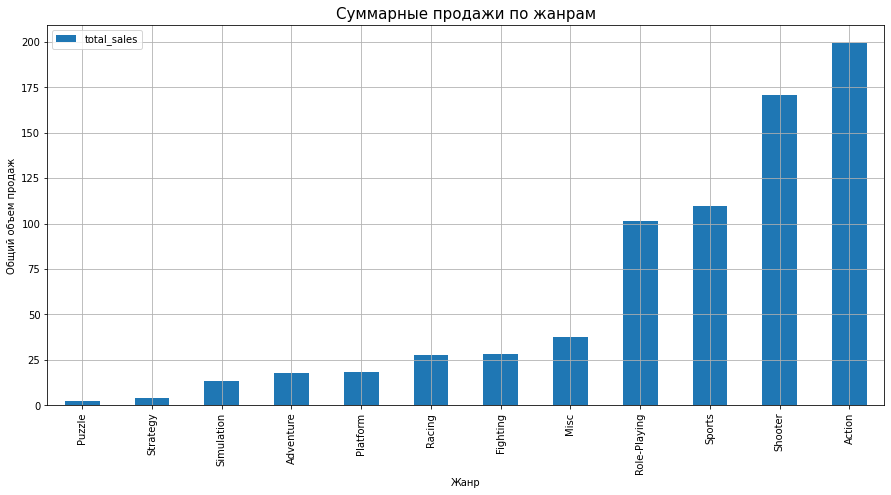

In [62]:
current_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=True).plot(kind = 'bar',grid=True, figsize=(15, 7))
plt.title('Cуммарные продажи по жанрам', fontsize=15)
plt.ylabel('Общий объем продаж', fontsize=10)
plt.xlabel('Жанр', fontsize=10)

Shooter имеет самое высокое медианное количество проданных игр и самые высокие суммарные продажи, поэтому его можно назвать самым прибыльным жанром.

Action имеет высокие суммарные продажи, однако низкое медианное значение. А вот Sports высокие суммарные продажи и досмтаточно высокое медианное значение, поэтому его можно поставить на второе место. С Role-Playing такая же ситуация, как и с Sports, поэтому его можно поставить на третье место.

Самым непопулярным жанром по суммарным продажам является Pluzzle, его медианное значение также мало, поэтому можно сказать, что он действительно самый неприбыльный жанр.

##### Вывод по шагу 3

В период с 1980 по 1990 количество выпускаемых игр практически не меняется, далее с 1990 по 2008 наблюдается рост и с 2009 по 2016 идет резкий спад. Максимальное количество выпускаемых игр превышает числе 1440. 

Лидерами продаж являются платформы:

* PS2
* X360
* PS3
* Wii
* DS
* PS

Характерный срок за который появляются новые игры это 1 год, а вот исчезают они постепенно за 4 - 5 лет.

Актуальным периодом взяли с 2008 года, так как именно с этого года происходит спад.

Наиболее прибыльные по последним данным платформы:

* PS4
* XOne
* 3DS
* PC
* WiiU

У всех платформ продажи идут на спад, но у эих трех самое большое количество продаж за последнее время. Большего всего продается платформа PS4, хотя 3DS не сильно от неё отстает.

Критики имеют влияние на продажи внутри платформы PS4 в отличае от отзывов покупателей. Для 3DS влияние критиков и пользователей имеют примерно одинаковый вес и оба имеют вес на продажи. А вот для платформы XOne критики имеют небольшой вес, но он есть, в отличае от пользователей.

Shooter имеет самое высокое медианное количество проданных игр и самые высокие суммарные продажи, поэтому его можно назвать самым прибыльным жанром.

Action имеет высокие суммарные продажи, однако низкое медианное значение. А вот Sports высокие суммарные продажи и досмтаточно высокое медианное значение, поэтому его можно поставить на второе место. С Role-Playing такая же ситуация, как и с Sports, поэтому его можно поставить на третье место.

Самым непопулярным жанром по суммарным продажам является Pluzzle, его медианное значение также мало, поэтому можно сказать, что он действительно самый неприбыльный жанр.

#### Шаг 4. Составим портрет пользователя каждого региона

*Определим для пользователя каждого региона (NA, EU, JP):*
#####  Самые популярные платформы (топ-5)

*Для пользователей каждого региона NA*

Text(0.5, 0, 'Рейтинг')

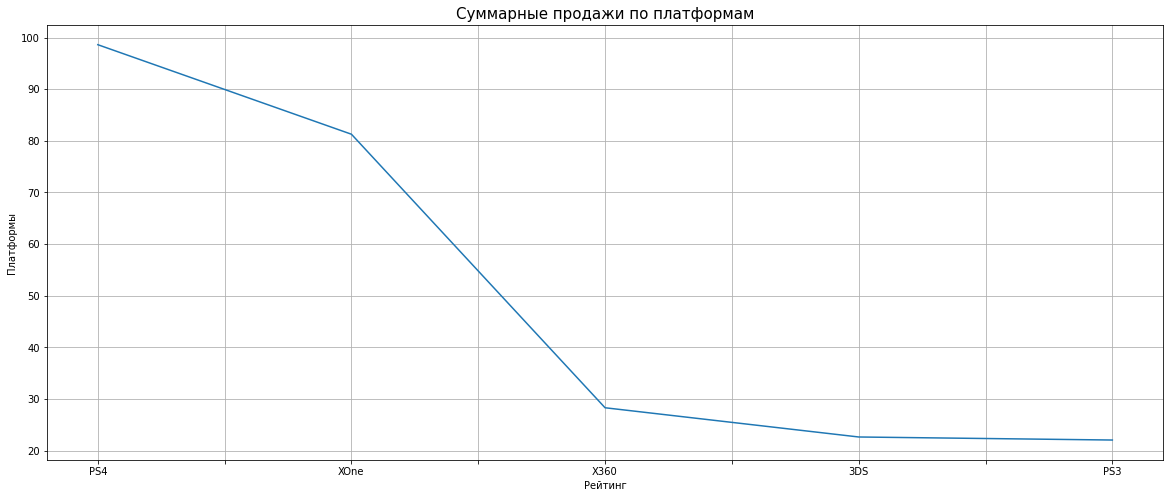

In [63]:
current_period.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(x = 'platform', y = 'na_sales', figsize=(20,8), grid=True)
plt.title('Суммарные продажи по платформам', fontsize=15)
plt.ylabel('Платформы', fontsize=10)
plt.xlabel('Рейтинг', fontsize=10)

*Для пользователей каждого региона EU*

Text(0.5, 0, 'Рейтинг')

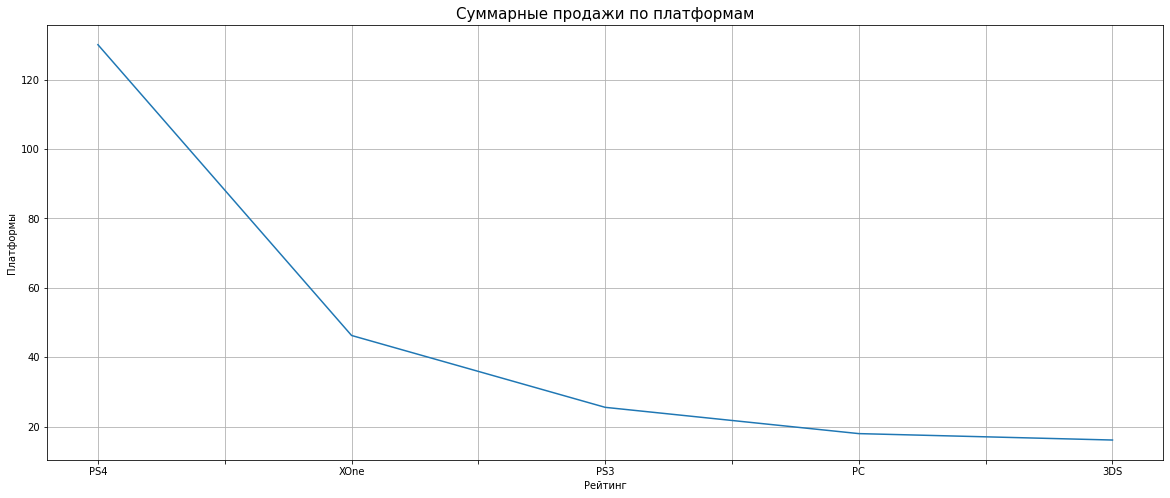

In [64]:
current_period.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(x = 'platform', y = 'eu_sales', figsize=(20,8), grid=True)
plt.title('Суммарные продажи по платформам', fontsize=15)
plt.ylabel('Платформы', fontsize=10)
plt.xlabel('Рейтинг', fontsize=10)

*Для пользователей каждого региона JP*

Text(0.5, 0, 'Рейтинг')

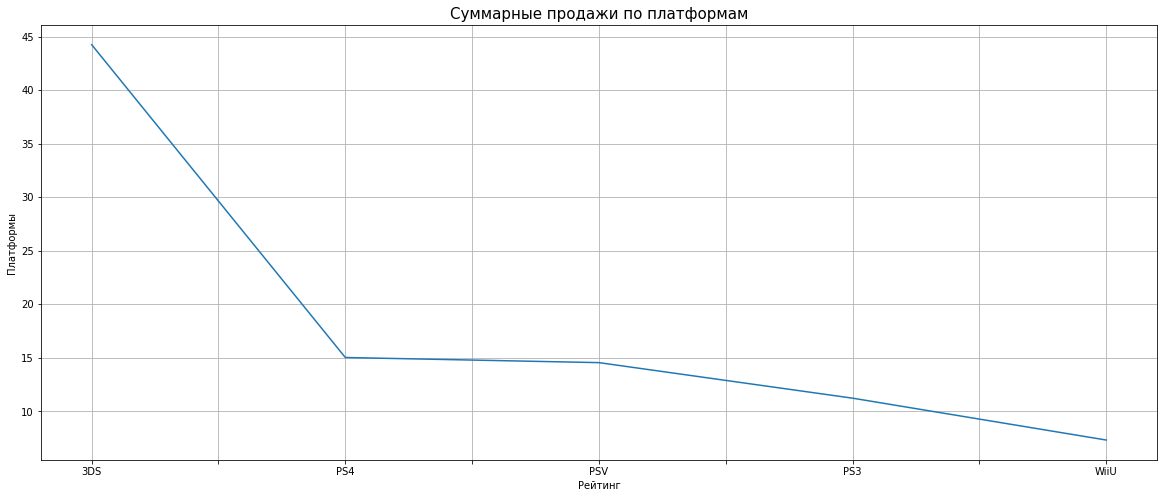

In [65]:
current_period.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(x = 'platform', y = 'jp_sales', figsize=(20,8), grid=True)
plt.title('Суммарные продажи по платформам', fontsize=15)
plt.ylabel('Платформы', fontsize=10)
plt.xlabel('Рейтинг', fontsize=10)

Для Северной Америки самыми популярными платформами являются:
* PS4
* XOne
* XBOX360
* 3DS
* PS3

Для Европейского региона самыми популярными платформами являются:
* PS4
* XOne
* PS3
* PC
* 3DS


Для Японии самыми популярными платформами являются:
* 3DS
* PS4
* PSV
* PS3
* WiiU

#####  Самые популярные жанры (топ-5).

*Для пользователей каждого региона NA*

Text(0.5, 0, 'Рейтинг')

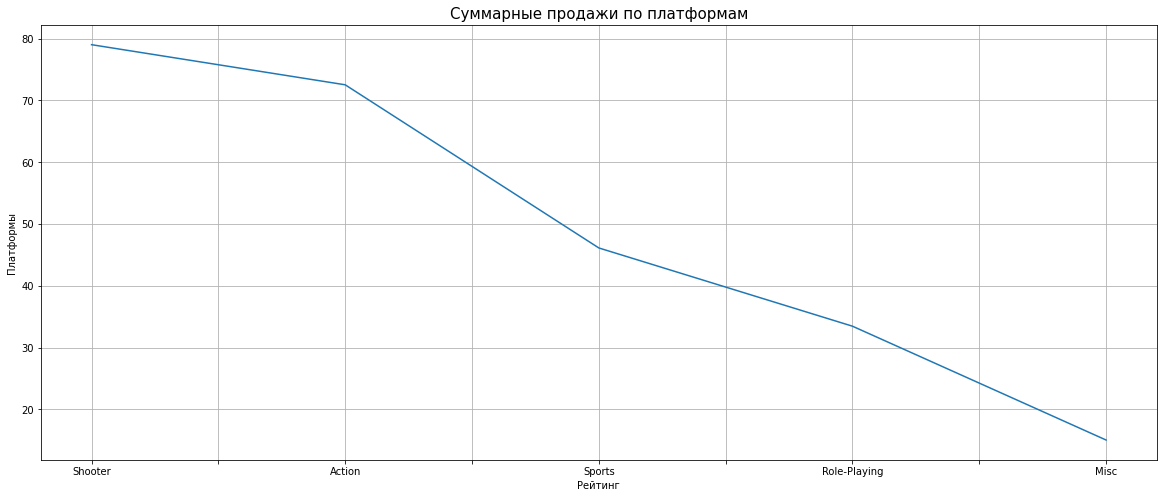

In [66]:
current_period.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(x = 'genre', y = 'na_sales', figsize=(20,8), grid=True)
plt.title('Суммарные продажи по платформам', fontsize=15)
plt.ylabel('Платформы', fontsize=10)
plt.xlabel('Рейтинг', fontsize=10)

*Для пользователей каждого региона EU*

Text(0.5, 0, 'Рейтинг')

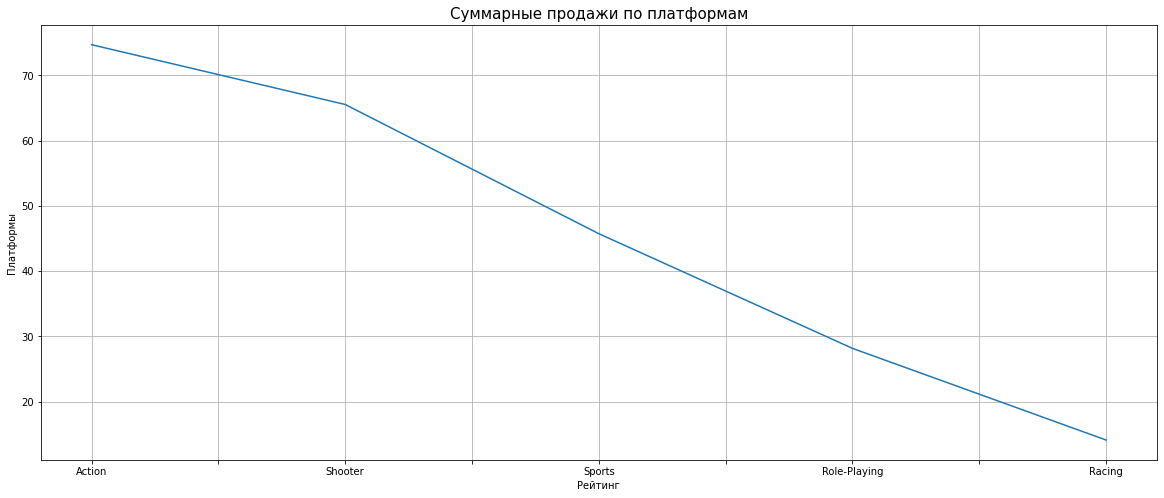

In [67]:
current_period.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(x = 'genre', y = 'eu_sales', figsize=(20,8), grid=True)
plt.title('Суммарные продажи по платформам', fontsize=15)
plt.ylabel('Платформы', fontsize=10)
plt.xlabel('Рейтинг', fontsize=10)

*Для пользователей каждого региона JP*

Text(0.5, 0, 'Рейтинг')

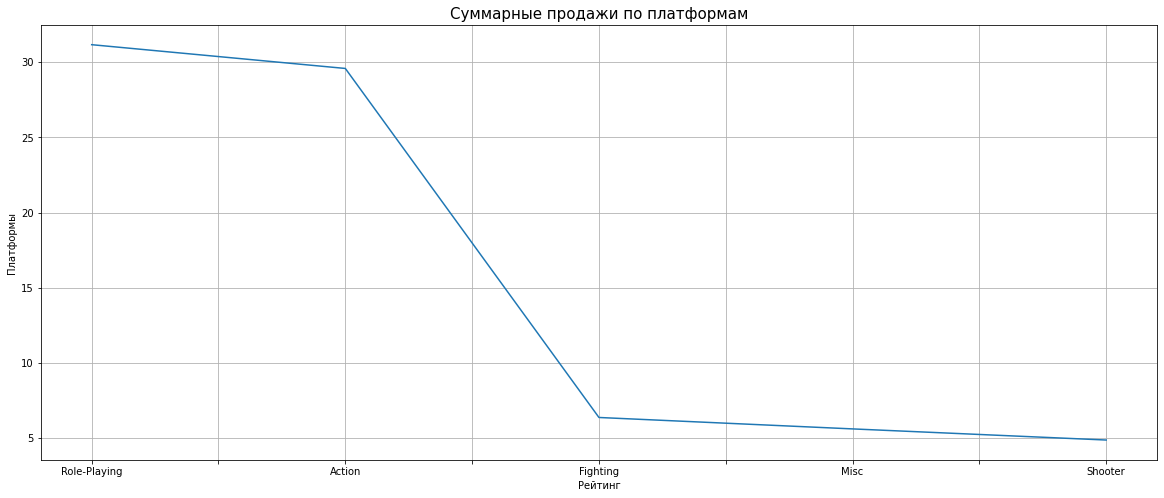

In [68]:
current_period.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(x = 'genre', y = 'jp_sales', figsize=(20,8), grid=True)
plt.title('Суммарные продажи по платформам', fontsize=15)
plt.ylabel('Платформы', fontsize=10)
plt.xlabel('Рейтинг', fontsize=10)

*Некоторые платформы одинаково популярны в разных регионах, но, тем не менее, разница есть и она может быть связана с менталитетом, популярностью и доступностью платформ в различных регионах.*

Для Северной Америки самыми популярными платформами являются:
* Shooter
* Action
* Sports
* Role-Playing
* Misc

Для Европейского региона самыми популярными платформами являются:
* Action
* Shooter
* Sports
* Role-Playing
* Racing

Для Японии самыми популярными платформами являются:
* Role-Playing
* Action
* Fighting
* Misc
* Shooter

#####  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

*Для пользователей каждого региона NA*

Text(0.5, 0, 'Рейтинг')

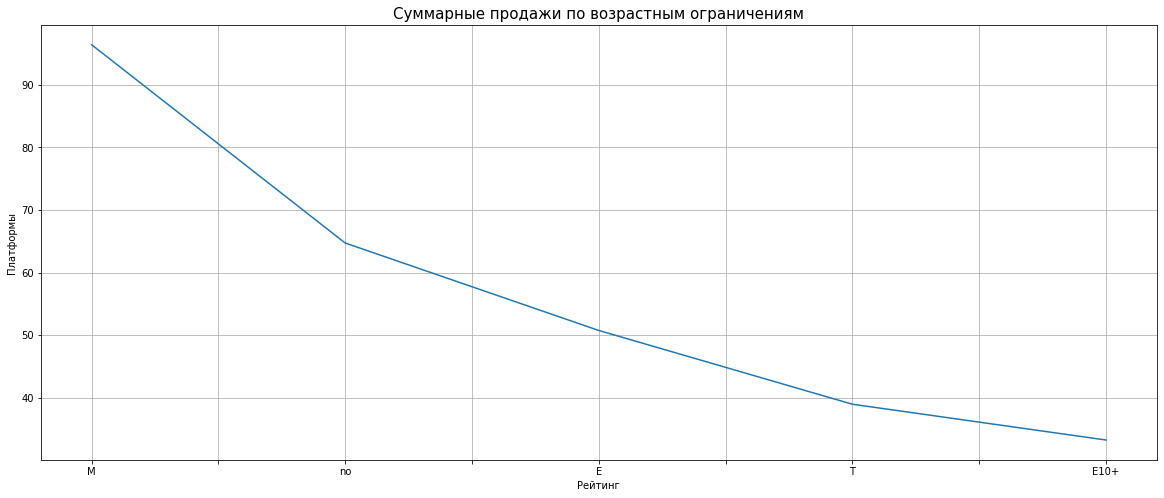

In [69]:
current_period.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5).plot(x = 'rating', y = 'na_sales', figsize=(20,8), grid=True)
plt.title('Суммарные продажи по возрастным ограничениям', fontsize=15)
plt.ylabel('Платформы', fontsize=10)
plt.xlabel('Рейтинг', fontsize=10)

*Для пользователей каждого региона EU*

Text(0.5, 0, 'Рейтинг')

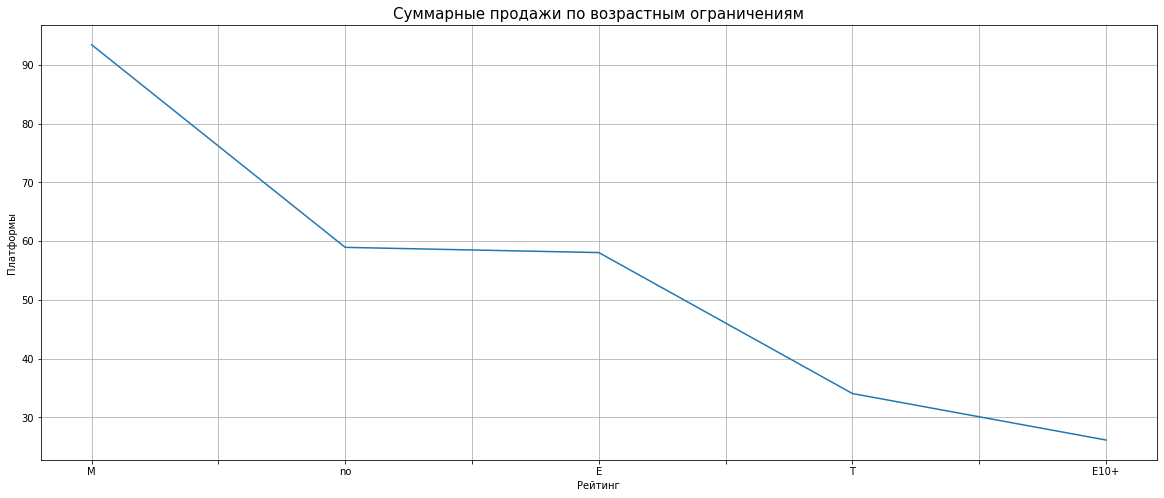

In [70]:
current_period.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(x = 'rating', y = 'eu_sales', figsize=(20,8), grid=True)
plt.title('Суммарные продажи по возрастным ограничениям', fontsize=15)
plt.ylabel('Платформы', fontsize=10)
plt.xlabel('Рейтинг', fontsize=10)

*Для пользователей каждого региона JP*

Text(0.5, 0, 'Рейтинг')

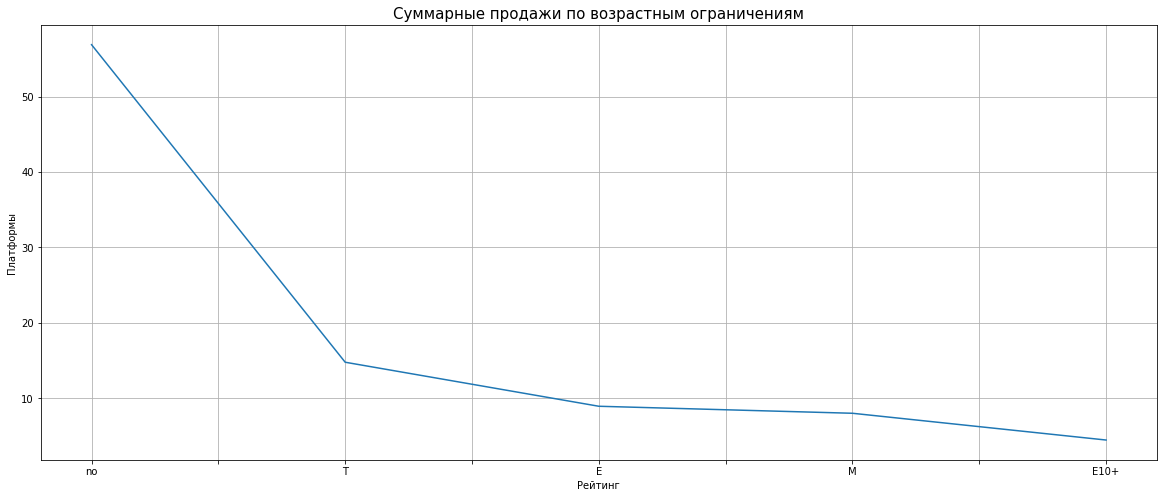

In [71]:
current_period.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(x = 'rating', y = 'jp_sales', figsize=(20,8), grid=True)
plt.title('Суммарные продажи по возрастным ограничениям', fontsize=15)
plt.ylabel('Платформы', fontsize=10)
plt.xlabel('Рейтинг', fontsize=10)

Для Северной Америки самыми популярными являются игры с возрастным ограничением:
* M
* no
* E
* T
* E10+

Для Европейского региона самыми популярными являются игры с возрастным ограничением:
* M
* no
* E
* T
* E10+

Для Японии самыми популярными являются игры с возрастным ограничением:
* no
* T
* E
* M
* E10+

В Северной Америки и Европе возрастное ограничение  одинаково, но оно разное с Японией. Возможно это связано с ограничениями по доступности игр в разных регионах, а также с разным интересам к играм у людей различным возрастом.

##### Вывод по шагу 4

**Самые популярные платформы в разных регионах**

Для Северной Америки самыми популярными платформами являются:
* PS4
* XOne
* XBOX360
* 3DS
* PS3

Для Европейского региона самыми популярными платформами являются:
* PS4
* XOne
* PS3
* PC
* 3DS


Для Японии самыми популярными платформами являются:
* 3DS
* PS4
* PSV
* PS3
* WiiU

**Самые популярные жанры в разных регионах**

Для Северной Америки самыми популярными платформами являются:
* Shooter
* Action
* Sports
* Role-Playing
* Misc

Для Европейского региона самыми популярными платформами являются:
* Action
* Shooter
* Sports
* Role-Playing
* Racing

Для Японии самыми популярными платформами являются:
* Role-Playing
* Action
* Fighting
* Misc
* Shooter

**Рейтинг влияет на продазжи игр в разных регионах**

Для Северной Америки самыми популярными являются игры с возрастным ограничением:
* M
* no
* E
* T
* E10+

Для Европейского региона самыми популярными являются игры с возрастным ограничением:
* M
* no
* E
* T
* E10+

Для Японии самыми популярными являются игры с возрастным ограничением:
* no
* T
* E
* M
* E10+

Разница может быть связана с менталитетом, популярностью и доступностью платформ в различных регионах.

#### Шаг 5. Проверьте гипотезы

*Пороговое значение alpha определим 0.05*

In [72]:
alpha = 0.05

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

*Сформируем гипотезу.*

H0: Средние рейтинги платформ Xbox One и PC одинаковы.

H1: Средние рейтинги платформ Xbox One и PC различны.

*Мы сформировали гипотизу H0. Исходя из H0 формулируется альтернативная гипотеза H1. Это утверждение, которое принимается верным, если отбрасывается H0. Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.*

In [73]:
data_1 = current_period[current_period['user_score'] != -1]

In [74]:
xbox = data_1.query('platform == "XOne"')['user_score'].astype('float32')
pc = data_1.query('platform == "PC"')['user_score'].astype('float32')

results = st.ttest_ind(xbox, pc)# проведите тест и посчитайте p-значение

# выведите на экран полученное p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha:# сравните p-значение с заданным уровнем значимости alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.1045065010608105
Не получилось отвергнуть нулевую гипотезу


*Итог проверки: Не получилось отвергнуть нулевую гипотезу*

##### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

*Сформируем гипотезу.*

H0: Средние рейтинги платформ Action и Sports одинаковы.

H1: Средние рейтинги платформ Action и Sports различны.

*Мы сформировали гипотизу H0. Исходя из H0 формулируется альтернативная гипотеза H1. Это утверждение, которое принимается верным, если отбрасывается H0. Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.*

In [75]:
action = data_1.query('genre == "Action"')['user_score'].astype('float32')
sports = data_1.query('genre == "Sports"')['user_score'].astype('float32')

results = st.ttest_ind(action, sports)# проведите тест и посчитайте p-значение

# выведите на экран полученное p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha:# сравните p-значение с заданным уровнем значимости alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.871146400695882e-19
Отвергаем нулевую гипотезу


*Итог проверки: Отвергаем нулевую гипотезу*

##### Вывод по шагу 5

Мы проверили две гипотизы, из которых мы сделали вывод, что:
* Средние рейтинги платформ Xbox One и PC различны.
* Пользовательские рейтинги жаров Action и Sports одинаковы.

При этом мы выбрали двусторонний тест для проверки гипотиз, потому что есть возможное отклонение и в большую, и в меньшую стороны. Значение alpha выбрали самостоятельно равное 0.05

#### Шаг 6. Напишите общий вывод

##### ОБЩИЙ ВЫВОД:

Таким образом, мы провели исследование по интернет-магазину «Стримчик», который продаёт по всему миру компьютерные игры. Нам был дан датафрейм с данными об играх, в которых мы также могли изучить следущие данные:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Для начала мы подробнее изучили данные (вывели саму таблицу, посморели типы данных столбцов, пропуски и вывели гистограммы). 

Далее подготовили данные к работе. Привели названия столбцов к нижнему регистру. Изменили типы данных в столбце year_of_release, чтобы удобнее работать с датами, в столбце critic_score для экономии памяти и в столбце user_score для удобства работы с данными. Преобразовали данные к нужному типу: 

* year_of_release на тип Int32
* critic_score на тип Int64
* user_score на тип float32

Убрали возможные пропуски:

* Name (удалили строки, тк данные невозможно восстановить)
* Year_of_Release (заменили на медианное значение по платформам)
* Genre (удалили строки, тк данные невозможно восстановить)
* Critic_Score (заменили пропуски на -1.)
* User_Score (заменили tbd на пропуск, остальные пропуски заменили на -1)
* Rating (заменим пропуски на 'no', показывая, что ограничений нет)

Далее, мы посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

Затем нужно было провести исследовательский анализ. Мы посмотрели, сколько игр выпускалось в разные годы. В период с 1980 по 1990 количество выпускаемых игр практически не меняется, далее с 1990 по 2008 наблюдается рост и с 2009 по 2016 идет резкий спад. Максимальное количество выпускаемых игр превышает числе 1440. Думаю, для анализа нам наиболее важны периоды роста и спада, то есть периоды с 1990 по 2008 и с 2009 по 2016. 

Посмотрели, как менялись продажи по платформам. Выбрали платформы с наибольшими суммарными продажами и построим распределение по годам. Лидерами продаж являются:
* PS2
* X360
* PS3
* Wii
* DS
* PS 

Характерный срок за который появляются новые игры это 1 год, а вот исчезают они постепенно за 4 - 5 лет.

Актуальный период для составления прогноза на 2017 год будет начинатся с 2014 года, так как именно с этого года происходит спад. Рассмотрели, какие платформы лидируют по продажам, растут или падают. Наиболее прибыльные по последним данным платформы:
* PS4
* XOne
* 3DS
* PC
* WiiU

У всех платформ продажи идут на спад, но у эих трех самое большое количество продаж за последнее время.

Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. По графику можно сказать, что большего всего продается платформа PS4, хотя 3DS не сильно от неё отстает. Медиана у PS4 находится дальше остальных, разброс также больше. Также есть небольшое количество выбросов.


Shooter имеет самое высокое медианное количество проданных игр и самые высокие суммарные продажи, поэтому его можно назвать самым прибыльным жанром.

Action имеет высокие суммарные продажи, однако низкое медианное значение. А вот Sports высокие суммарные продажи и досмтаточно высокое медианное значение, поэтому его можно поставить на второе место. С Role-Playing такая же ситуация, как и с Sports, поэтому его можно поставить на третье место.

Самым непопулярным жанром по суммарным продажам является Pluzzle, его медианное значение также мало, поэтому можно сказать, что он действительно самый неприбыльный жанр.

Выяснили, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Критики имеют влияние на продажи внутри платформы PS4 в отличае от отзывов покупателей. Для 3DS влияние критиков и пользователей имеют примерно одинаковый вес и оба имеют вес на продажи. А вот для платформы XOne критики имеют небольшой вес, но он есть, в отличае от пользователей.


Определили самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP):

Для Северной Америки самыми популярными платформами являются:
* PS4
* XOne
* XBOX360
* 3DS
* PS3

Для Европейского региона самыми популярными платформами являются:
* PS4
* XOne
* PS3
* PC
* 3DS


Для Японии самыми популярными платформами являются:
* 3DS
* PS4
* PSV
* PS3
* WiiU



Самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP):

Для Северной Америки самыми популярными платформами являются:
* Shooter
* Action
* Sports
* Role-Playing
* Misc

Для Европейского региона самыми популярными платформами являются:
* Action
* Shooter
* Sports
* Role-Playing
* Racing

Для Японии самыми популярными платформами являются:
* Role-Playing
* Action
* Fighting
* Misc
* Shooter


Определили влияние рейтинга ESRB на продажи в отдельном регионе: 


**Рейтинг влияет на продажи игр в разных регионах**

Для Северной Америки самыми популярными являются игры с возрастным ограничением:
* M
* no
* E
* T
* E10+

Для Европейского региона самыми популярными являются игры с возрастным ограничением:
* M
* no
* E
* T
* E10+

Для Японии самыми популярными являются игры с возрастным ограничением:
* no
* T
* E
* M
* E10+

Разница может быть связана с менталитетом, популярностью и доступностью платформ в различных регионах.


Далее мы проверили несколько гипотез  сделали следующие выводы:

* Средние рейтинги платформ Xbox One и PC различны.
* Пользовательские рейтинги жаров Action и Sports одинаковы.

При этом мы выбрали двусторонний тест для проверки гипотиз, потому что есть возможное отклонение и в большую, и в меньшую стороны. Значение alpha выбрали самостоятельно равное 0.05
